In [1]:
# Import libraries
import pandas as pd
from google.cloud import bigquery #pip install google-cloud-bigquery for SQL
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
project='' #Put your project id

In [3]:
# Initialize a BigQuery Client
client=bigquery.Client(project)

In [4]:
# Construct a reference to a dataset 
dataset_ref=client.dataset('bbc_news', project='bigquery-public-data')

In [5]:
# Fetch the dataset
dataset=client.get_dataset(dataset_ref)

In [6]:
# List all the tables
tables=list(client.list_tables(dataset))

In [7]:
# Print their names
list_of_tables=[table.table_id for table in tables]
print(list_of_tables)

['fulltext']


In [8]:
# Construct the reference to a table
table_ref=dataset_ref.table('fulltext')

In [9]:
# Get info on the columns
table=client.get_table(table_ref)
table.schema

[SchemaField('body', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('title', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('filename', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('category', 'STRING', 'NULLABLE', None, None, (), None)]

In [10]:
# Put the table to a DataFrame and preview
df = client.list_rows(table).to_dataframe()
df.head(50)

/Users/anna_verbytska/Documents/BBC-News/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,body,title,filename,category
0,The global web blog community is being called ...,Global blogger action day called,bbc/tech/016.txt,tech
1,"The ""digital divide"" between rich and poor nat...",Global digital divide 'narrowing',bbc/tech/033.txt,tech
2,The current slew of sports games offers unpara...,Sporting rivals go to extra time,bbc/tech/056.txt,tech
3,Writing a Microsoft Word document can be a dan...,Warning over Windows Word files,bbc/tech/086.txt,tech
4,"Aid workers trying to house, feed and clothe m...",Satellite mapping aids Darfur relief,bbc/tech/223.txt,tech
5,DVDs will be harder to copy thanks to new anti...,DVD copy protection strengthened,bbc/tech/326.txt,tech
6,UK mobile owners continue to break records wit...,Text message record smashed again,bbc/tech/372.txt,tech
7,Internet TV has been talked about since the st...,TV's future down the phone line,bbc/tech/394.txt,tech
8,Intel has unveiled research that could mean da...,Intel unveils laser breakthrough,bbc/tech/019.txt,tech
9,BBC Sport unveils its new analysis tool Piero ...,Piero gives rugby perspective,bbc/tech/028.txt,tech


### EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      2225 non-null   object
 1   title     2225 non-null   object
 2   filename  2225 non-null   object
 3   category  2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [12]:
# Check for duplicated articles
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
2220    False
2221    False
2222    False
2223    False
2224    False
Length: 2225, dtype: bool

In [21]:
# Check one article
for idx in df.sample(3).index:
    text = df.iloc[idx]  
    print("Body: {}:".format(text.body))
    print("Title: {}\n".format(text.title))
    print("Category: {}".format(text.category))

Body: Leading British computer games maker Peter Molyneux has been made an OBE in the New Year Honours list.

The head of Surrey's Lionhead Studios was granted the honour for services to the computer games industry. Mr Molyneux has been behind many of the ground-breaking games of the last 15 years such as Populous, Theme Park, Dungeon Keeper and Black and White. He is widely credited with helping to create and popularise the so-called god-game genre.

Speaking to the BBC News website Mr Molyneux said receiving the honour was something of a surprise. It's come completely out of the blue," he said, "I never would have guessed that I'd have that kind of honour." He said he was surprised as much because, not too long ago, many people thought computer gaming was a fad.

"It was thought to be like skateboarding," he said, "a craze that everyone thought would go away." Now, he said, the gaming world rivals the movie industry for sales and cultural influence. "Britain plays a big part in it," 

In [14]:
# Count unique categories
df["category"].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

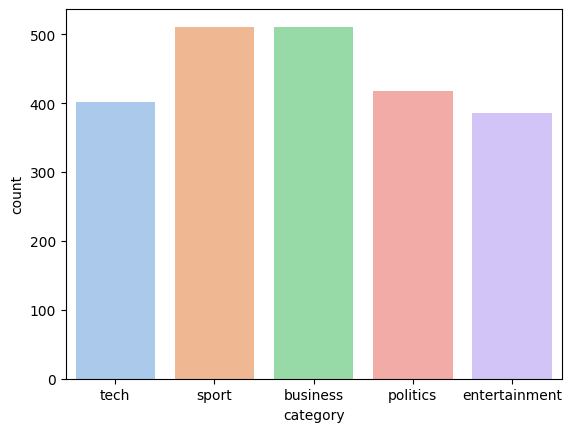

In [15]:
# Visualize categories for balance
sns.countplot(x="category",  hue='category', legend=False, data=df, palette='pastel')

In [16]:
# The count of words in the longest article across categories
categories=['tech', 'sport', 'business', 'politics', 'entertainment']
print("The longest article by category (Word Count):")
for category in categories:
    max_words = df[df['category'] == category]['body'].apply(lambda x: len(x.split())).max()
    print(f"{category.capitalize()}: {max_words} words")


The longest article by category (Word Count):
Tech: 2964 words
Sport: 1656 words
Business: 885 words
Politics: 4428 words
Entertainment: 3477 words


In [17]:

# The count of words in the shortest article across categories
print("The shortest article by category (Word Count):")
for category in categories:
    min_words = df[df['category'] == category]['body'].apply(lambda x: len(x.split())).min()
    print(f"- {category.capitalize():<15}: {min_words} words")

The shortest article by category (Word Count):
- Tech           : 157 words
- Sport          : 108 words
- Business       : 136 words
- Politics       : 84 words
- Entertainment  : 138 words


Note: the category of politics has the longest and the shortest articles

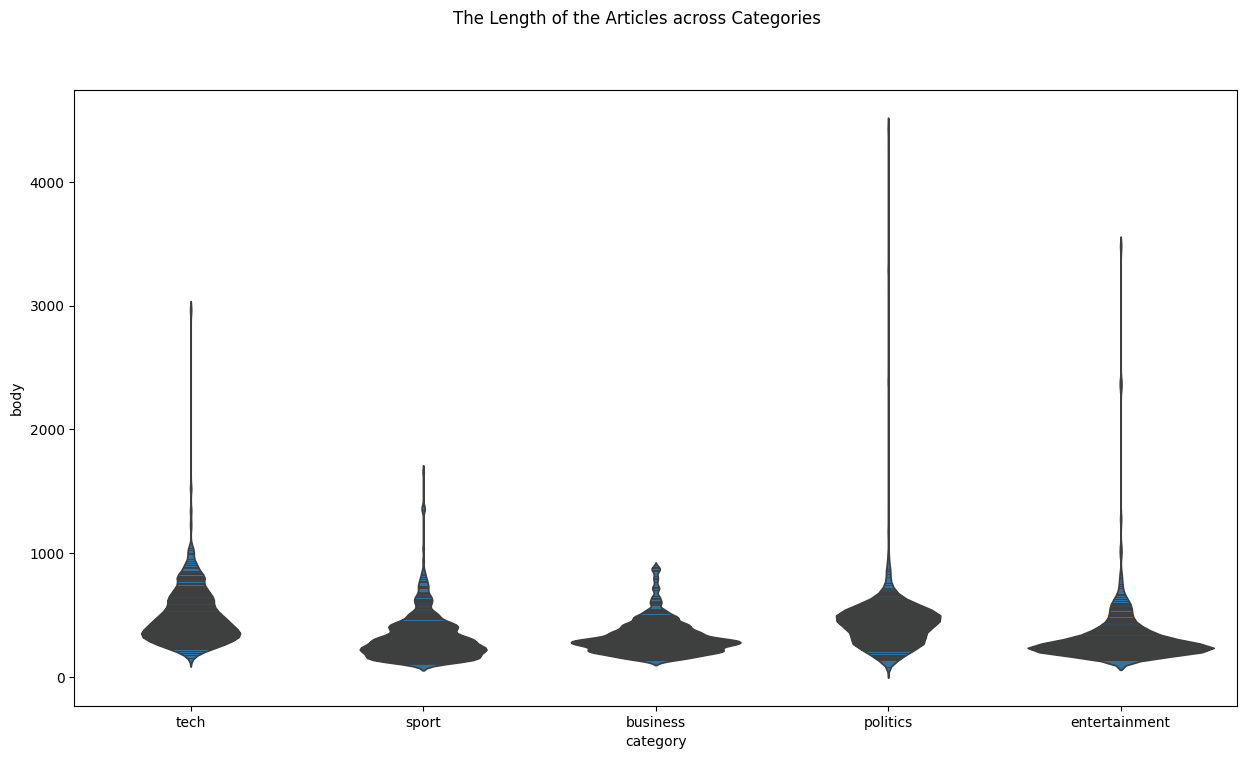

In [18]:
# Visualize length of articles across the categories for balance
fig, axs = plt.subplots(figsize=(15,8))
fig.suptitle("The Length of the Articles across Categories")
axs=sns.violinplot( x=df['category'], y=df["body"].apply(lambda x : len(x.split())), bw_adjust=.5, inner="stick")

plt.show()

<Axes: xlabel='category', ylabel='body'>

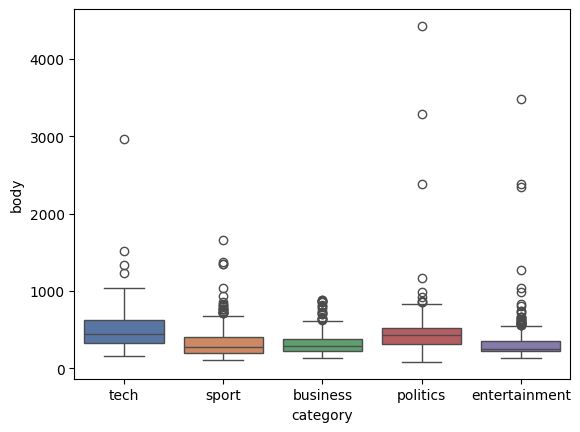

In [19]:
# Visualise article length for outliers
sns.boxplot(data=df, x='category', hue='category', y=df["body"].apply(lambda x : len(x.split())), palette='deep')

Note: further topic modelling and sentiment analysis may be biased by skewed article length.

LDA: Longer texts might dominate the topic distribution, while shorter texts may not provide enough data for clear topic identification.
BERTopic: even though it is a more advanced technique, extremely long texts may dominate the embeddings and clustering process, influencing the learned topics. Shorter texts might have less impact on the topic distribution, which can bias the model.

Possible solutions: 
normalization for LDA: stopword removal, stemming, lemmatization, truncation or better filtering short docs (max_words=500 or min_words=20)
normalization for BERTopic: chunking long texts and treating them as separate docs, embed the chunks, filtering very short texts.
